## Google play store data in EDA:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading and Exploration and Cleaning:

In [4]:
df=pd.read_csv('googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Set options to be maximum for rows and columns:


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Hide all warnings: (sometime uneccessary warnings will comes)
import warnings
warnings.filterwarnings('ignore')

In [7]:
print(f" The number of index are: {df.columns}")

 The number of index are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [8]:
print(f"The numbers of rows are: {df.shape[0]}, and columns are {df.shape[1]}")

The numbers of rows are: 10841, and columns are 13


## Run automatic EDA using ydata_profiling:

In [89]:
# import ydata_profiling as yd
# import os
# os.makedirs("Pandas_tips_and_tricks/outputs", exist_ok=True)
# profile=yd.ProfileReport(df)
# profile.to_file("Pandas_tips_and_tricks/outputs/googleplaystore.html")

In [9]:
df.describe() #summary of data or describe columns will show just numberic columns

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1526,auto Call Recorder 2018,LIBRARIES_AND_DEMO,4.5,929,7.0M,"50,000+",Free,0,Everyone,Libraries & Demo,"February 16, 2018",1.02.2018.11,4.0 and up
4687,V-CUBE Seminar Mobile,BUSINESS,4.3,542,30M,"100,000+",Free,0,Everyone,Business,"April 17, 2018",1.23.0,4.0 and up


In [12]:
df['Size'].isnull().sum()

np.int64(0)

In [13]:
# Find the values having M in them:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [14]:
# Find the values having k in them:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [15]:
# Find the values having Varies with device in them:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [16]:
1695+316+8829

10840

In [17]:
len(df)

10841

In [18]:
# Convert the whole size columns into bytes

#let's define  a function:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', ""))* 1024
        elif 'M' in size:
            return float(size.replace('M', ""))*1024 *1024
        elif 'Varies with devices' in size:
            return np.nan
    return size

In [19]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [20]:
df['Size']=df['Size'].apply(convert_size)

In [21]:
df['Size']

0                19922944.0
1                14680064.0
2                 9122611.2
3                26214400.0
4                 2936012.8
5                 5872025.6
6                19922944.0
7                30408704.0
8                34603008.0
9                 3250585.6
10               29360128.0
11               12582912.0
12               20971520.0
13               22020096.0
14               38797312.0
15                2831155.2
16                5767168.0
17               17825792.0
18               40894464.0
19               32505856.0
20               14680064.0
21               12582912.0
22                4404019.2
23                7340032.0
24               24117248.0
25                6291456.0
26               26214400.0
27                6396313.6
28                4823449.6
29                4404019.2
30                9646899.2
31                5452595.2
32               11534336.0
33               11534336.0
34                4404019.2
35                96

In [22]:
df.rename(columns= {'Size':'Size_in_bytes'}, inplace=True)

In [23]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Convert size into mega_bytes:

In [ ]:
# df['Size_in_Mb']=df['Size_in_bytes'].apply(lambda x:  x/ (1024*1024))
# convert to numeric
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

# now convert bytes → MB
df['Size_in_Mbs'] = df['Size_in_bytes'] / (1024 * 1024)

In [25]:
df['Size_in_kbs']=df['Size_in_bytes'].apply(lambda x: x/1024)

In [26]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Size_in_kbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


In [27]:
print(f"The number of columns is: {df.columns}")

The number of columns is: Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Size_in_kbs'],
      dtype='object')


In [109]:
# df.drop('Size_in_Mb', axis=1, inplace=True)


## Let's check the install columns:

In [28]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [29]:
df['Installs'].nunique()

22

In [30]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [31]:
df['Installs'].isnull().sum()

np.int64(0)

## `Install columns`
1. remove + sign,

2. remove ,

3. convert columns into an integers 

In [114]:
# df['Installs']= df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x) #according to sir but gave me type change in error

In [115]:
# df['Installs']= df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)#according to sir but gave me type change in error

In [32]:
# df['Installs']= df['Installs'].apply(lambda x: int(x))  which gave me chatgpt and no error and type change easily
# Remove '+' and ',' from values
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
# Convert safely to numbers
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Replace NaN (non-numeric values) with 0
df['Installs'] = df['Installs'].fillna(0).astype(int)


In [33]:
df['Installs'].dtype

dtype('int64')

In [34]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

In [35]:
df['Installs'].max()

np.int64(1000000000)

In [36]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10841 non-null  int64
dtypes: int64(1)
memory usage: 84.8 KB


In [37]:
# making a new columns called 'Installs_category' which will have the category of the intalls:
bins=[-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000,10000000000]
labels= ['no', 'Very low', 'low', 'Moderate', 'More than moderate', 'high', 'very high', 'top notch']
df['Installs_Category']=pd.cut(df['Installs'], bins=bins, labels=labels)# 

In [38]:
df['Installs_Category'].value_counts()# installs columns check and then binning

Installs_Category
low                   2161
high                  2118
very high             2004
More than moderate    1648
Moderate              1531
top notch              828
Very low               535
no                      16
Name: count, dtype: int64

In [39]:
2161+2118+2004+1648+1531+828+535+16

10841

In [40]:
df.describe()

,Rating,Size_in_bytes,Installs,Size_in_Mbs,Size_in_kbs
count,9367.000000,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546291e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502557e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [41]:
df['Reviews'].value_counts()

Reviews
0           596
1           272
2           214
3           175
4           137
5           108
6            97
7            90
8            74
9            65
10           64
12           60
11           52
13           49
17           48
19           41
14           41
20           35
21           35
16           35
15           31
24           30
25           30
30           30
38           29
18           27
22           26
27           25
23           25
33           24
28           24
26           22
41           22
29           20
32           20
31           19
35           18
39           18
36           17
48           17
37           17
45           17
54           17
44           16
52           15
40           15
64           15
34           14
43           14
53           14
78           13
114          13
66           13
67           13
69           13
55           13
51           12
47           12
88           12
60           12
80           12
42           12


In [42]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [43]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mbs,Size_in_kbs
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [44]:
df['Price'].nunique()

93

In [45]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$3.49           7
$29.99          7
$7.99           7
$24.99          7
$5.49           6
$19.99          6
$12.99          5
$6.49           5
$8.99           5
$11.99          5
$2.00           3
$10.00          3
$16.99          3
$1.00           3
$7.49           2
$17.99          2
$8.49           2
$10.99          2
$79.99          2
$9.00           2
$39.99          2
$1.70           2
$3.95           2
$13.99          2
$33.99          2
$15.99          1
$1.50           1
$400.00         1
$74.99          1
$25.99          1
$3.88           1
$4.84           1
$1.76           1
$3.02           1
$4.77           1
$1.59           1
$2.50           1
$1.29           1
$1.61           1
$5.00           1
$299.99         1
$37.

## Let's see how many values have $  sign:

In [46]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [47]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('/$'))] .value_counts().sum()

np.int64(10223)

In [48]:
df['Price']= df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [49]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
3.49            7
29.99           7
7.99            7
24.99           7
5.49            6
19.99           6
12.99           5
6.49            5
8.99            5
11.99           5
2.00            3
10.00           3
16.99           3
1.00            3
7.49            2
17.99           2
8.49            2
10.99           2
79.99           2
9.00            2
39.99           2
1.70            2
3.95            2
13.99           2
33.99           2
15.99           1
1.50            1
400.00          1
74.99           1
25.99           1
3.88            1
4.84            1
1.76            1
3.02            1
4.77            1
1.59            1
2.50            1
1.29            1
1.61            1
5.00            1
299.99          1
37.9

In [50]:
# df['Price']= df['Price'].apply(lambda x: float(x))
# remove $ sign aur non-numeric values
df['Price'] = df['Price'].replace('[\$,]', '', regex=True)

# convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [51]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs,Size_in_kbs
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Using `f` of string in ```Min, Max, Average``` price of the app:

In [52]:
print(f"The minimum price of app:{df['Price'].min()}$")
print(f"The maximum price of app:{df['Price'].max()}$")
print(f"The average price of the app:{df['Price'].mean()}$")

The minimum price of app:0.0$
The maximum price of app:400.0$
The average price of the app:1.027368081180812$


## Check the `Missing Values` inside the data:

In [53]:
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending=True)

App                   0.00
Category              0.00
Installs              0.00
Genres                0.00
Last Updated          0.00
Installs_Category     0.00
Price                 0.01
Reviews               0.01
Type                  0.01
Content Rating        0.01
Android Ver           0.03
Current Ver           0.07
Rating               13.60
Size_in_bytes        15.64
Size_in_Mbs          15.64
Size_in_kbs          15.64
dtype: float64

## Find the ``Total missing`` values:

In [54]:
df.isnull().sum().sum()

np.int64(6577)

## `Plot` the misssing values:

<Axes: >

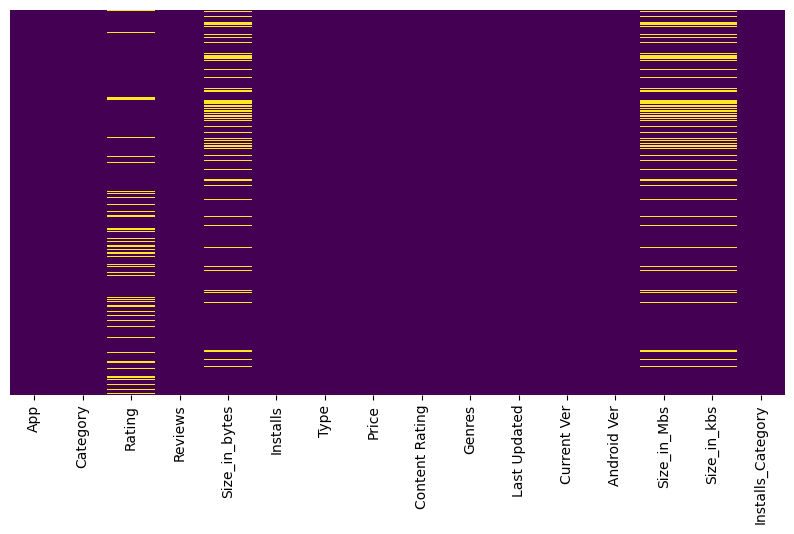

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing values in each Columns')

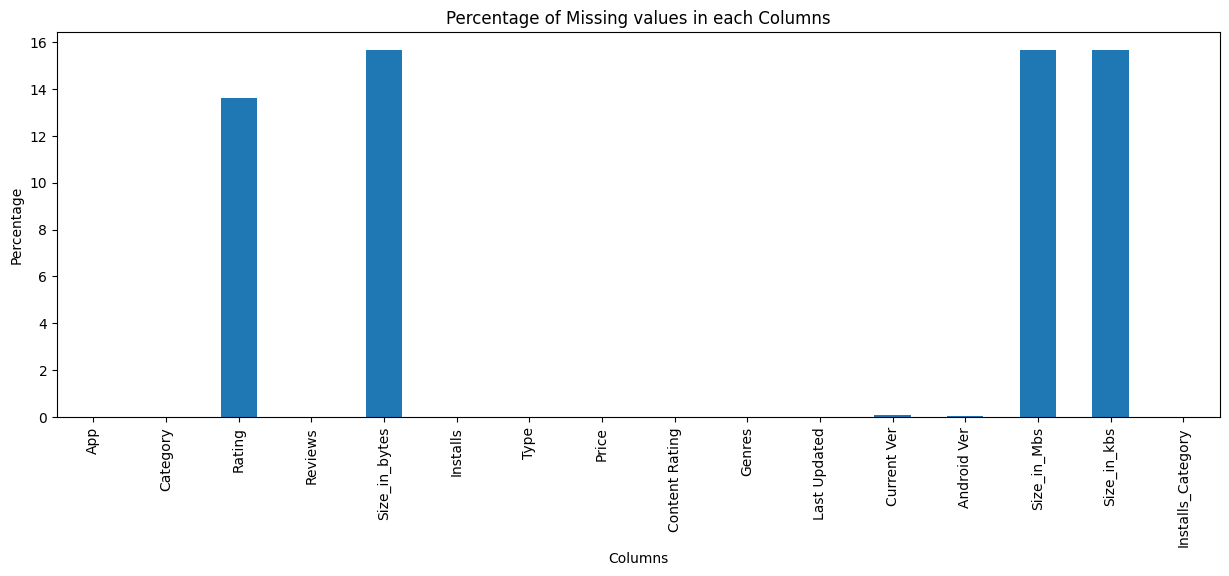

In [140]:
#make figure size:
plt.figure(figsize=(15,5))
#plot the null values by their percentage in each columns:
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
#add the labels:
plt.xlabel('Columns')#add the x-axis label
plt.ylabel('Percentage')#add the y-axis label
plt.title('Percentage of Missing values in each Columns')

Text(0.5, 1.0, 'Percentage of Missing values in each Columns withour rating in columns')

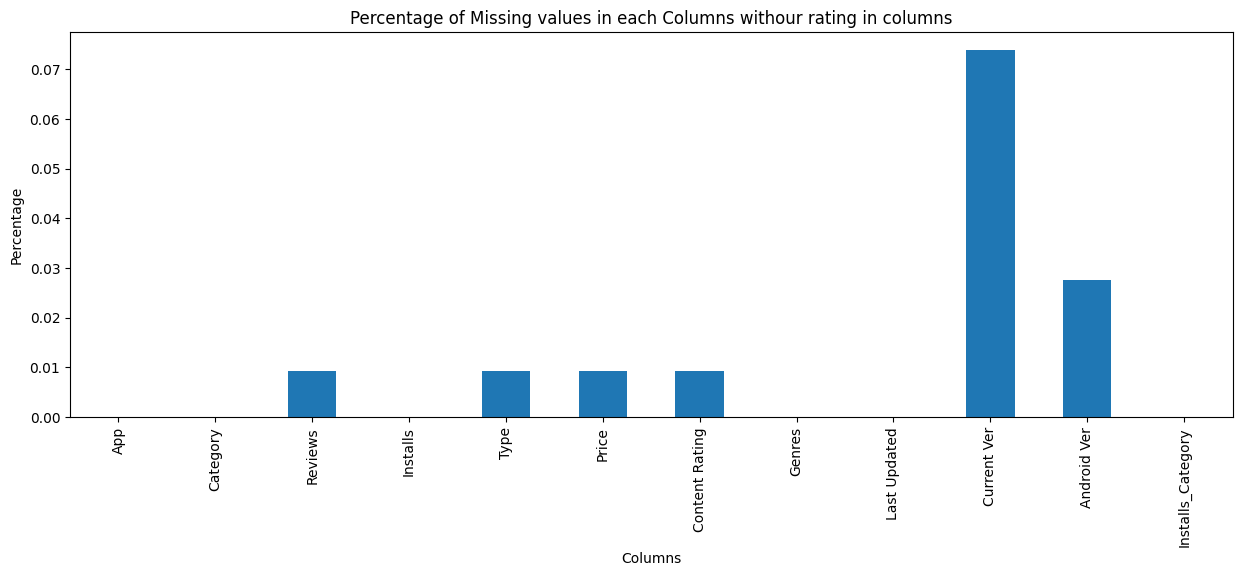

In [141]:
#make figure size:
plt.figure(figsize=(15,5))
missing_percentage[missing_percentage < 1].plot(kind='bar')
#add the labels:
plt.xlabel('Columns')#add the x-axis label
plt.ylabel('Percentage')#add the y-axis label
plt.title('Percentage of Missing values in each Columns withour rating in columns')

In [142]:
df.isnull().sum().sort_values(ascending=True)

App                     0
Category                0
Installs                0
Genres                  0
Last Updated            0
Installs_Category       0
Price                   1
Reviews                 1
Type                    1
Content Rating          1
Android Ver             3
Current Ver             8
Rating               1474
Size_in_bytes        1696
Size_in_Mbs          1696
Size_in_kbs          1696
dtype: int64

In [143]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

App                   0.000000
Category              0.000000
Installs              0.000000
Genres                0.000000
Last Updated          0.000000
Installs_Category     0.000000
Price                 0.009224
Reviews               0.009224
Type                  0.009224
Content Rating        0.009224
Android Ver           0.027673
Current Ver           0.073794
Rating               13.596532
Size_in_bytes        15.644313
Size_in_Mbs          15.644313
Size_in_kbs          15.644313
dtype: float64

In [144]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs,Size_in_kbs
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Make correlation matrix of numeric Columns: 

<Axes: >

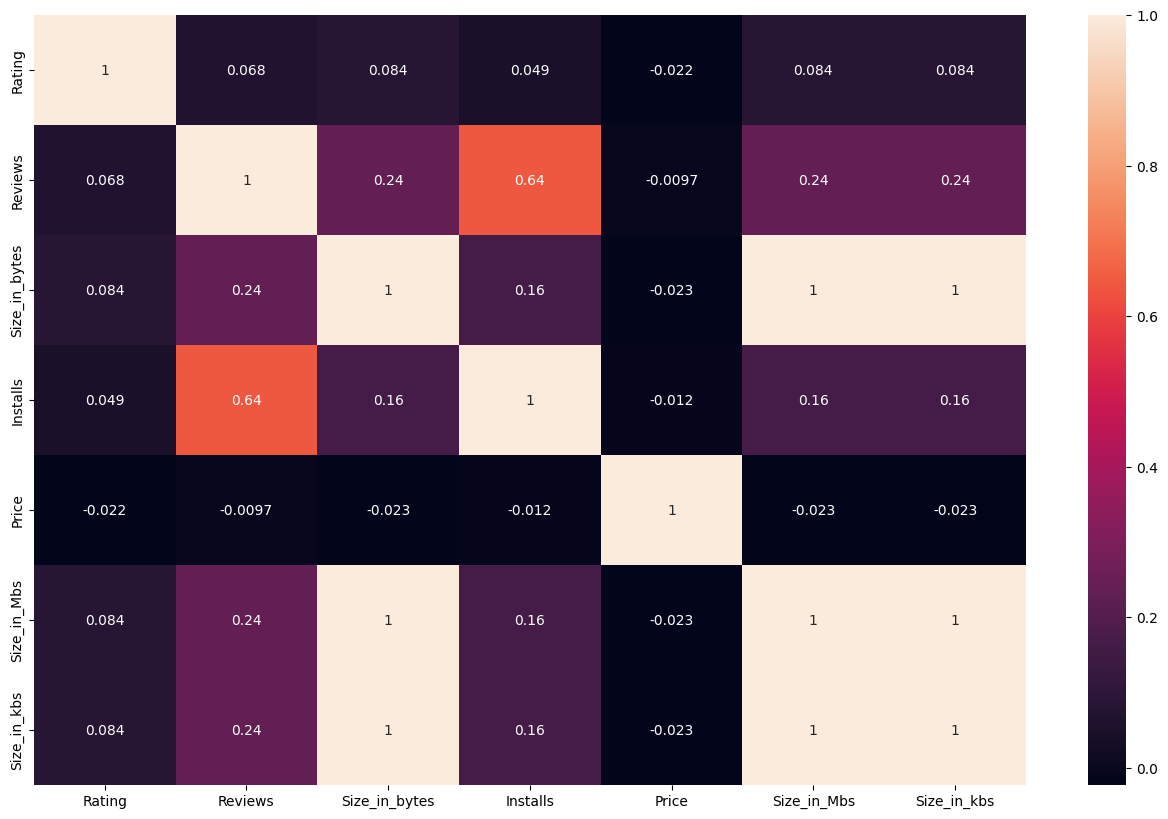

In [145]:
plt.figure(figsize=(16, 10))
numeric_cols=['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mbs', 'Size_in_kbs']
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [146]:
#we can also calculate the correlation matrics using pandas;
df[numeric_cols].corr()# this will show the correlation metrics.        

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs,Size_in_kbs
Rating,1.000000,0.068141,0.083737,0.048652,-0.021903,0.083737,0.083737
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.238214,0.238214
Size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000,1.000000
Installs,0.048652,0.643122,0.164787,1.000000,-0.011689,0.164787,0.164787
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000,-0.023007,-0.023007
Size_in_Mbs,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000,1.000000
Size_in_kbs,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000,1.000000


In [147]:
#Using statistics:
#We can calculate the Pearson's correlation coefficients using scipy as well as follows:
from scipy import stats
df_clean= df.dropna()# Remove rows containing NaN or infinite values(Important to calculating Pearson's R)

#Calculating Pearson's R between Reviews and Installs:
pearson_r, _ =  stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f'Pearsonr b/w Reviews and Installs:{pearson_r:.4f}')

Pearsonr b/w Reviews and Installs:0.6262


In [148]:
#Length before removing null values:
print(f'Length of DataFrame before removing the null values: {len(df)}')

Length of DataFrame before removing the null values: 10841


In [149]:
#Removing rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type', 'Genres':
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [150]:
#Length aftar removing null values:
print(f'Length of DataFrame before removing the null values: {len(df)}')

Length of DataFrame before removing the null values: 10829


### ```12 rows will be removes using dropna.```

In [151]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_kbs          1694
Size_in_Mbs          1694
Rating               1469
Reviews                 0
Installs                0
Category                0
App                     0
Price                   0
Type                    0
Content Rating          0
Genres                  0
Current Ver             0
Last Updated            0
Android Ver             0
Installs_Category       0
dtype: int64

In [152]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Size_in_kbs',
       'Installs_Category'],
      dtype='object')

In [153]:
#Use groupby function to find the trend of Rating in each Installs_Category:
df.groupby('Installs_Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_Category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
high,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
very high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
top notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [154]:
df['Rating'].isnull().sum()

np.int64(1469)

In [155]:
#which Installs_Category the Rating has NaN values:
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
high                    3
very high               0
top notch               0
Name: count, dtype: int64

Text(7, 3.5, 'Null values:0')

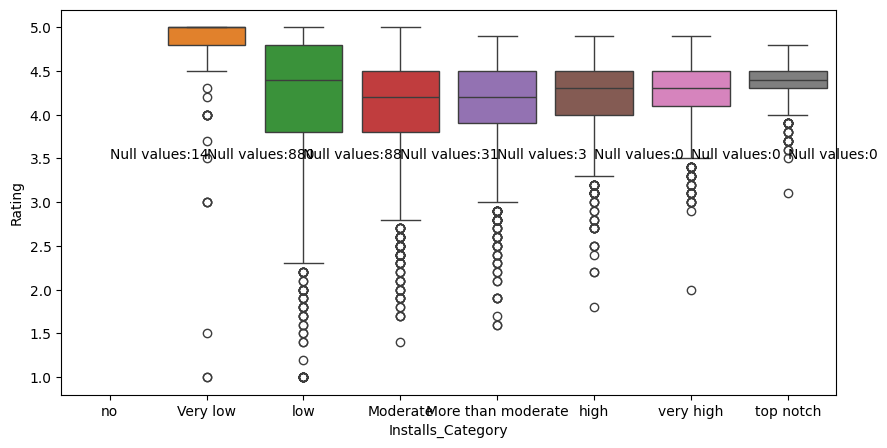

In [156]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Installs_Category', y='Rating', hue='Installs_Category', data=df)
plt.text(0, 3.5, 'Null values:14')
plt.text(1, 3.5, 'Null values:880')
plt.text(2, 3.5, 'Null values:88')
plt.text(3, 3.5, 'Null values:31')
plt.text(4, 3.5, 'Null values:3')
plt.text(5, 3.5, 'Null values:0')
plt.text(6, 3.5, 'Null values:0')
plt.text(7, 3.5, 'Null values:0')


In [157]:
# Replace missing Rating values with category-wise mean
df['Rating'] = df['Rating'].fillna(
    df.groupby('Installs_Category')['Rating'].transform('mean')
)


In [158]:
df['Rating'].value_counts().sum()

np.int64(10815)

In [159]:
#Check in review that have the missing values:
df['Installs_Category'].loc[df['Reviews'].isnull()].value_counts()


Installs_Category
no                    0
Very low              0
low                   0
Moderate              0
More than moderate    0
high                  0
very high             0
top notch             0
Name: count, dtype: int64

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

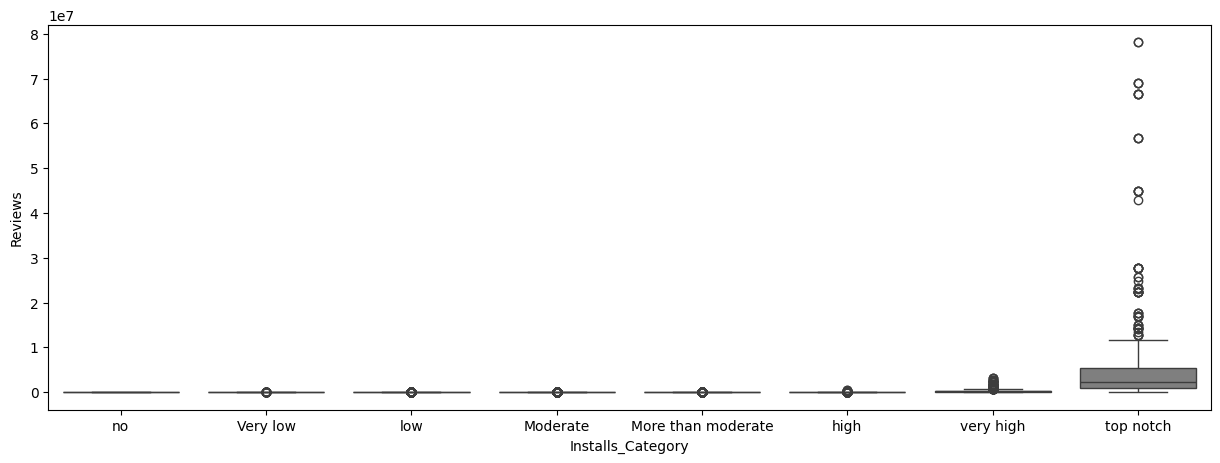

In [160]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Installs_Category', y='Reviews', hue='Installs_Category', data=df)

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

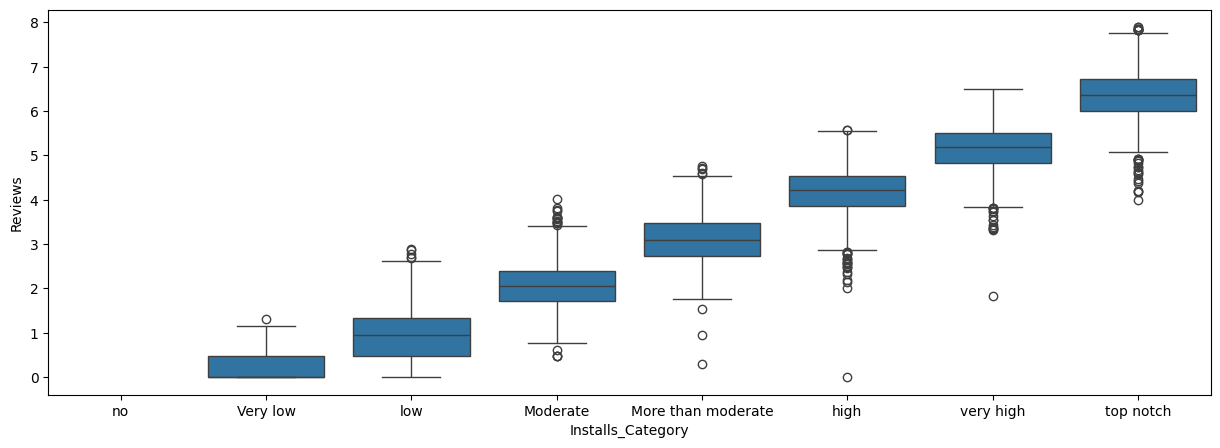

In [161]:
#let's plot the same plots for Reviews columns as well:
plt.figure(figsize=(15,5))#make the figure size
sns.boxplot(x='Installs_Category', y=np.log10(df['Reviews']), data=df) #make the boxplot

<Axes: xlabel='Rating', ylabel='Reviews'>

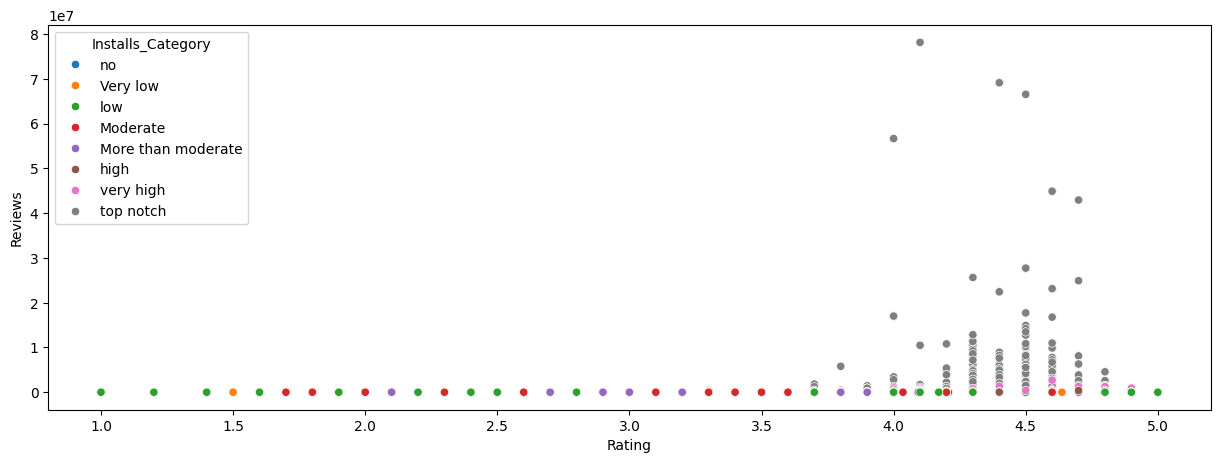

In [162]:
#Make the scatter plot between Rating, Reviews, and Installs_Category 
plt.figure(figsize=(15,5))#make the figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_Category', data=df)#plot the scatter plot

<Axes: xlabel='Rating', ylabel='Installs'>

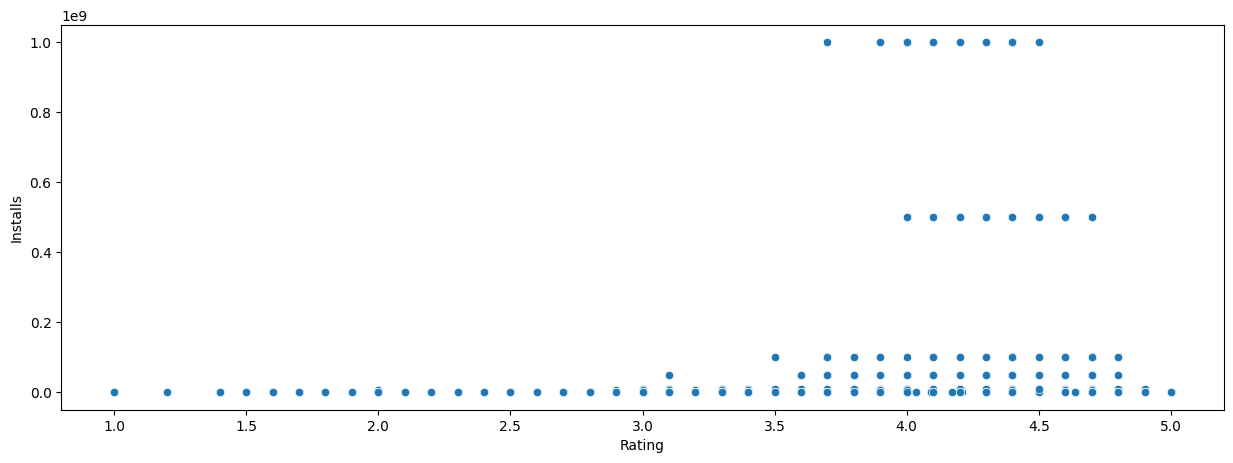

In [163]:
#we check the installs makes more reviews
plt.figure(figsize=(15,5))#make the figure size
sns.scatterplot(x='Rating', y='Installs', data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

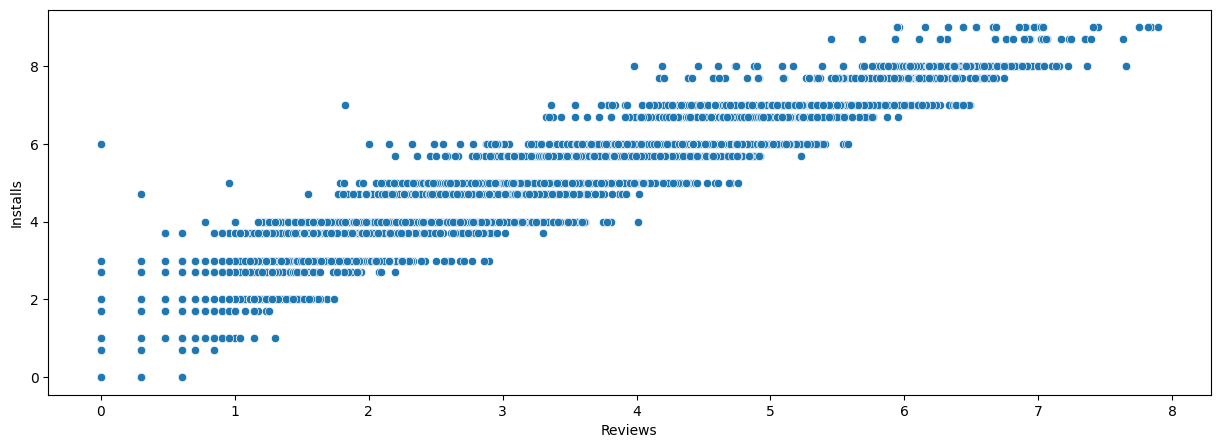

In [166]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)

<Figure size 1500x500 with 0 Axes>

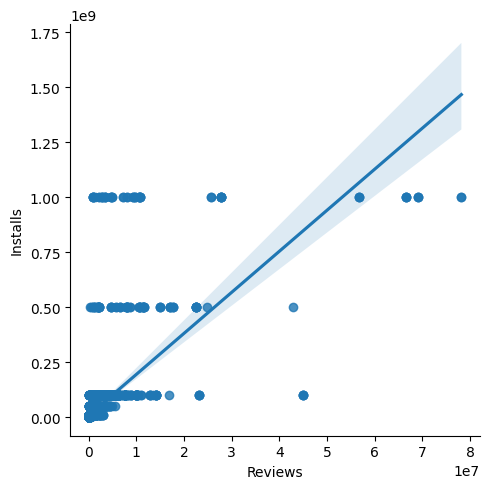

In [173]:
plt.figure(figsize=(15,5))
sns.lmplot(x='Reviews', y='Installs', data=df)

## Find the `Duplicates values`:

In [175]:
df.duplicated().sum()

np.int64(483)

In [177]:
#Find the duplicate values in Apps:
df['App'].duplicated().sum()

np.int64(1181)

In [186]:
#Let's check the number of duplicates:
for col in df.columns:
    print(f'Number of dupicates in {col} columns are: {df[col].duplicated().sum()}')

Number of dupicates in App columns are: 1181
Number of dupicates in Category columns are: 10796
Number of dupicates in Rating columns are: 10784
Number of dupicates in Reviews columns are: 4830
Number of dupicates in Size_in_bytes columns are: 10373
Number of dupicates in Installs columns are: 10809
Number of dupicates in Type columns are: 10827
Number of dupicates in Price columns are: 10737
Number of dupicates in Content Rating columns are: 10823
Number of dupicates in Genres columns are: 10710
Number of dupicates in Last Updated columns are: 9453
Number of dupicates in Current Ver columns are: 7998
Number of dupicates in Android Ver columns are: 10796
Number of dupicates in Size_in_Mbs columns are: 10373
Number of dupicates in Size_in_kbs columns are: 10373
Number of dupicates in Installs_Category columns are: 10821


In [188]:
#Find the duplicates and print them:
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Size_in_kbs,Installs_Category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,3891.2,high
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,3891.2,high
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160.0,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,26624.0,high
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160.0,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,26624.0,high
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12.0,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,3891.2,low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12.0,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,3891.2,low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506.0,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,15360.0,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506.0,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,15360.0,More than moderate
3083,365Scores - Live Scores,SPORTS,4.600000,666521.0,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,25600.0,very high
5415,365Scores - Live Scores,SPORTS,4.600000,666246.0,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,25600.0,very high


In [ ]:
#Remove the duplicates:
df.drop_duplicates(inplace=True)

In [197]:
#print the rows and columns after removing the duplicates:
print(f'Numbers of rows after the duplicating values:{df.shape[0]}')
print(f'Numbers of columns after the duplicating values:{df.shape[1]}')

Numbers of rows after the duplicating values:10346
Numbers of columns after the duplicating values:16


# Insight from the data:
## Which category has the highest numbers of `Apps`:

In [200]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

## Which `category` has the highest numbers of installs:

In [202]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452271905
FAMILY                 10041632405
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074483782
BOOKS_AND_REFERENCE     1916468576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
EDUCATION                533952000
WEATHER                  426100520
FOOD_AND_DRINK           257898751
DATING                   206536107
HOUSE_AND_HOME           125212461
ART_AND_DESIGN           124333100
LIBRARIES_AND_DEMO        61995910
COMICS                    56086150
AUTO_AND_VE

# Which apps has the highest `rating`?

In [203]:
#category with the highest average Rating:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
WEATHER                4.249133
BEAUTY                 4.244167
AUTO_AND_VEHICLES      4.231531
PRODUCTIVITY           4.229286
MEDICAL                4.216279
FAMILY                 4.201975
BUSINESS               4.188538
FOOD_AND_DRINK         4.188011
PHOTOGRAPHY            4.186570
COMMUNICATION          4.177694
HOUSE_AND_HOME         4.169548
LIBRARIES_AND_DEMO     4.168599
COMICS                 4.154404
NEWS_AND_MAGAZINES     4.154294
FINANCE                4.140407
ENTERTAINMENT          4.136036
LIFESTYLE              4.134565
TRAVEL_AND_LOCAL       4.116338
TOOLS                  4.080989
VIDEO_PLAYERS          4.077823

<Axes: xlabel='Rating', ylabel='Density'>

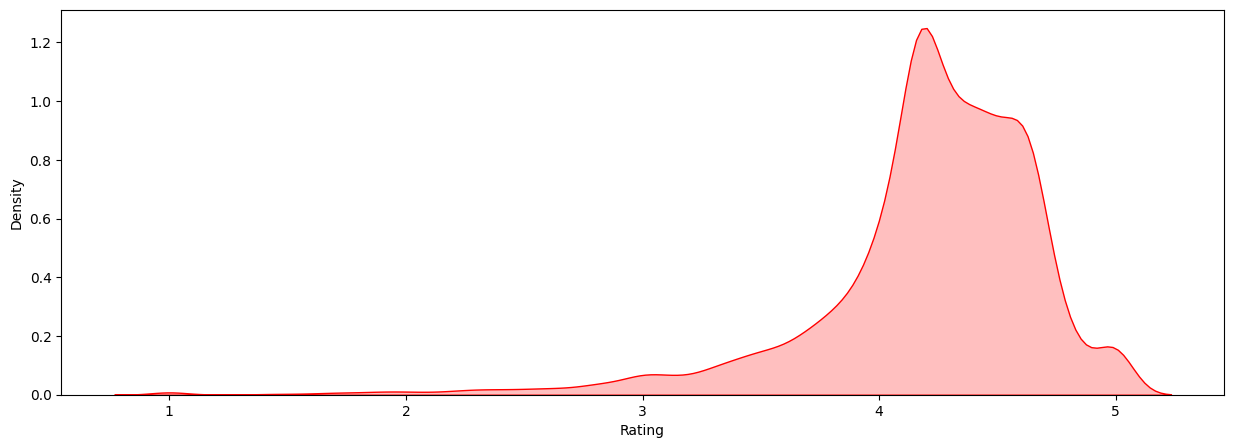

In [209]:
#plot the rating distribution:
plt.figure(figsize=(15,5))
sns.kdeplot(df['Rating'], color='red', shade=True)#plot the distribution plot

In [ ]:
df.head()

## Examples:

<Axes: xlabel='Installs', ylabel='Price'>

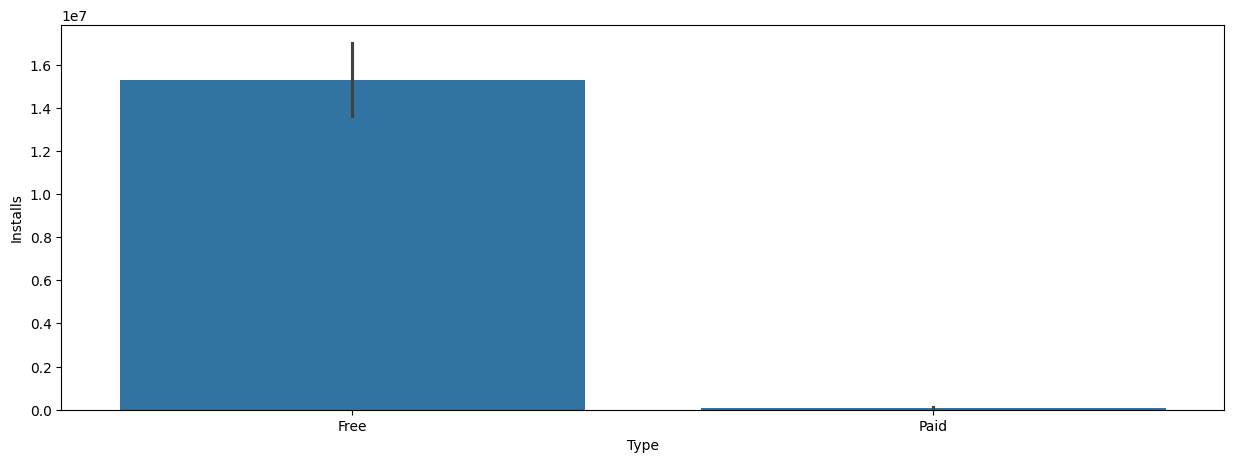

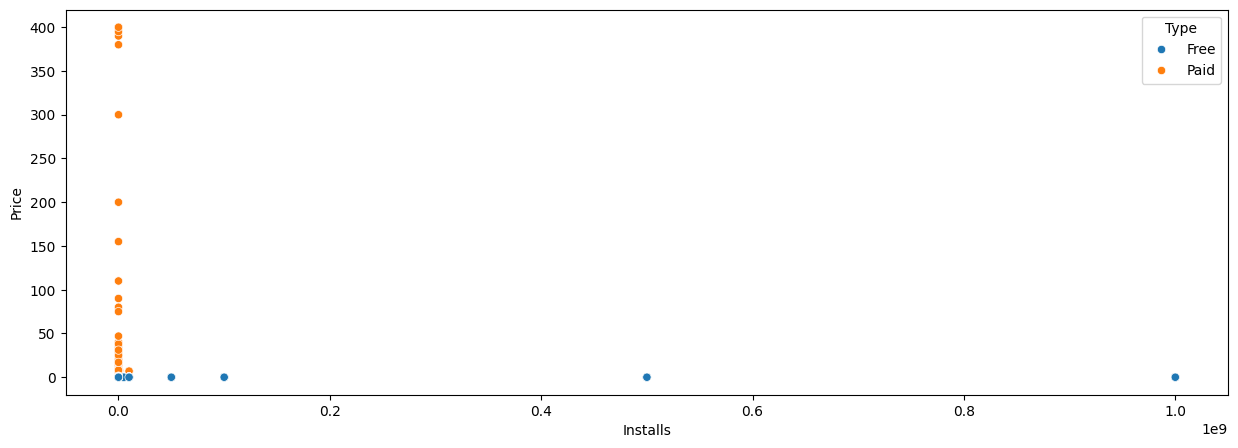

In [211]:
#plot number of installs for free and paid app make a bar plot
plt.figure(figsize=(15,5))
sns.barplot(x='Type', y='Installs', data=df)#plot the bar plot

#show scatter plot as well where x-axis is install and y-axis is price and hue is Type
plt.figure(figsize=(15,5))
sns.scatterplot(x='Installs', y='Price',  hue='Type', data=df)

<Axes: xlabel='Installs_Category', ylabel='Size_in_Mbs'>

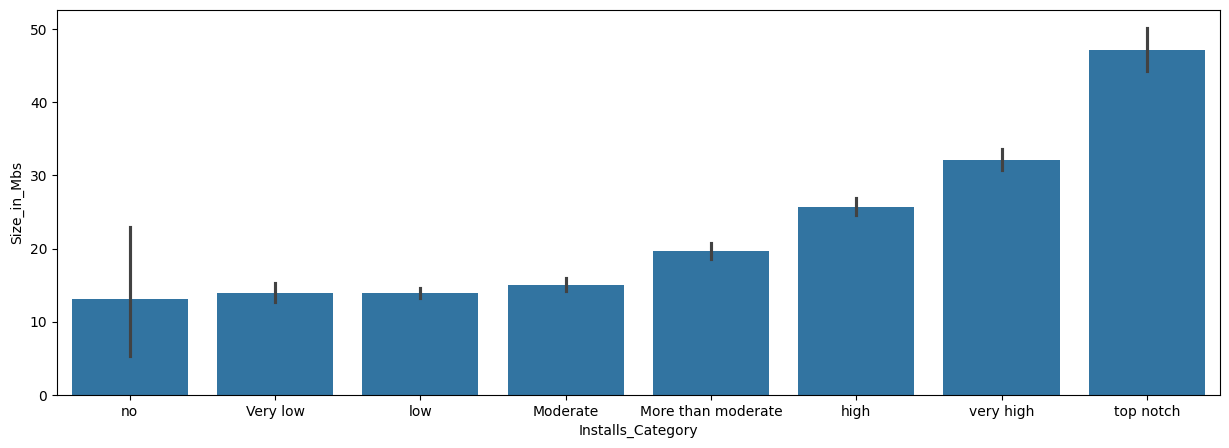

In [214]:
#check if there is any impact of size on installs
# make a barplot of Size_in_Mbs vs Installs_Category
plt.figure(figsize=(15,5)) 
sns.barplot(x='Installs_Category', y='Size_in_Mbs', data=df)

In [ ]:
#Which content rating is most popular in installs
df['Content Rating'].value_counts() #this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

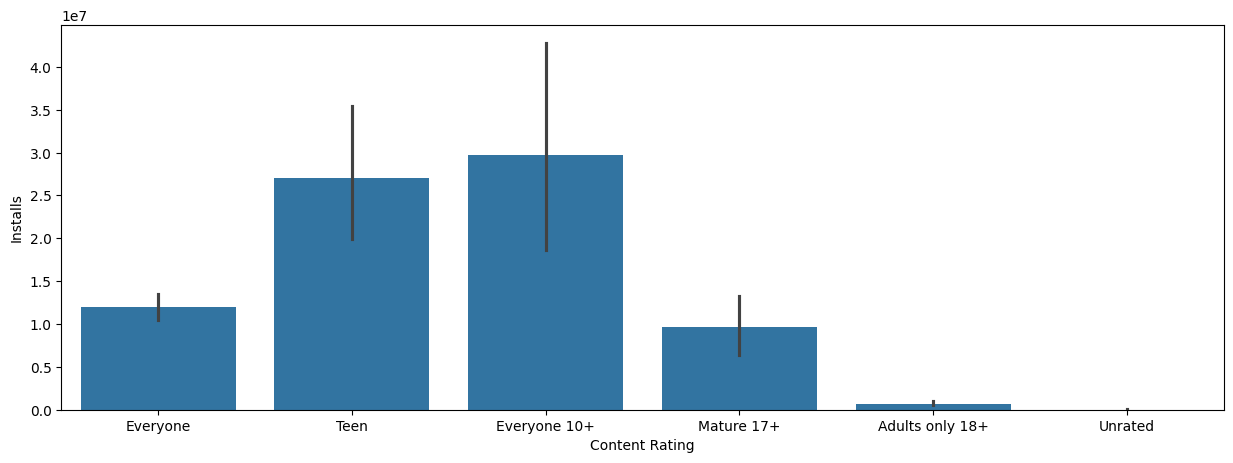

In [217]:
#plt the bar plot of Content Rating vs Installs
plt.figure(figsize=(15,5))
sns.barplot(x='Content Rating', y='Installs', data=df)

In [218]:
#Find how many apps are there in Everyone  content rating:
df['Category'].loc[df['Content Rating']=='Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

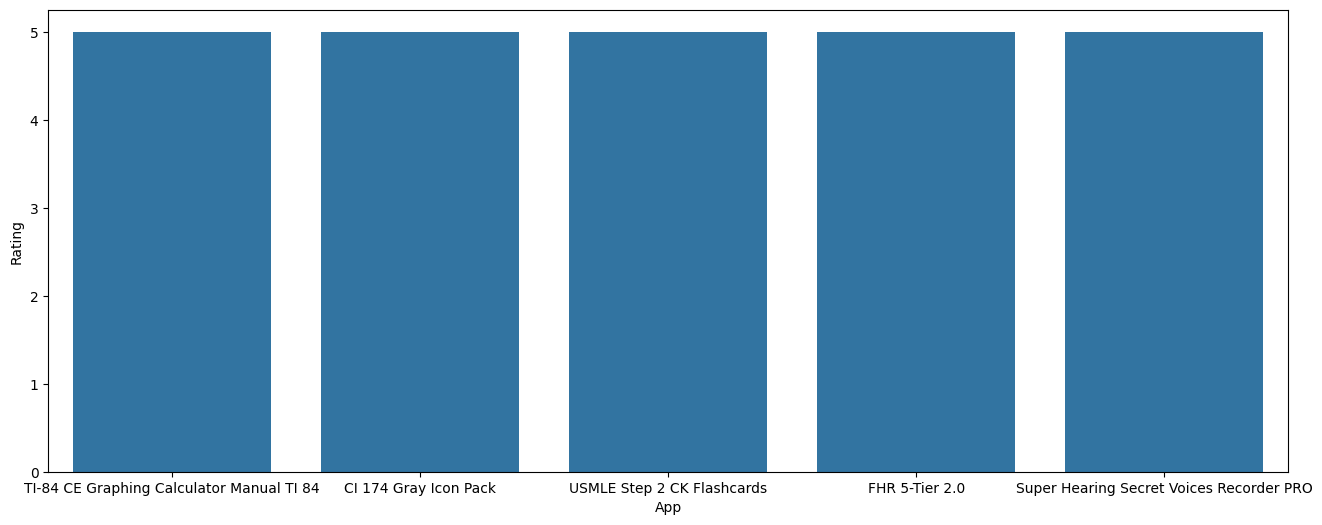

In [220]:
#plot top 5 rated paid apps
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Rating', data=df[df['Type']=='Paid'].sort_values(by='Rating', ascending=False).head(5))

<Axes: xlabel='App', ylabel='Reviews'>

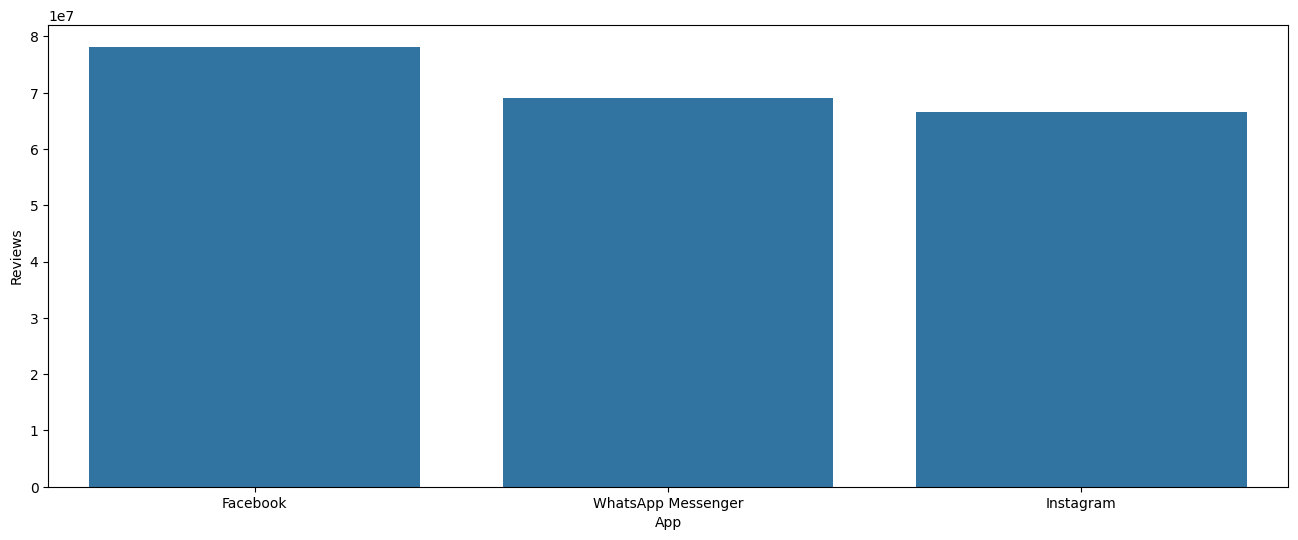

In [ ]:
#plot top 5 rated free apps
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Reviews', data=df[df['Type']=='Free'].sort_values(by='Reviews', ascending=False).head(5))

In [226]:
df[df['Type']=='Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Size_in_kbs,Installs_Category
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,top notch
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,top notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,top notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,top notch
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,NaN,top notch


<Axes: xlabel='App', ylabel='Reviews'>

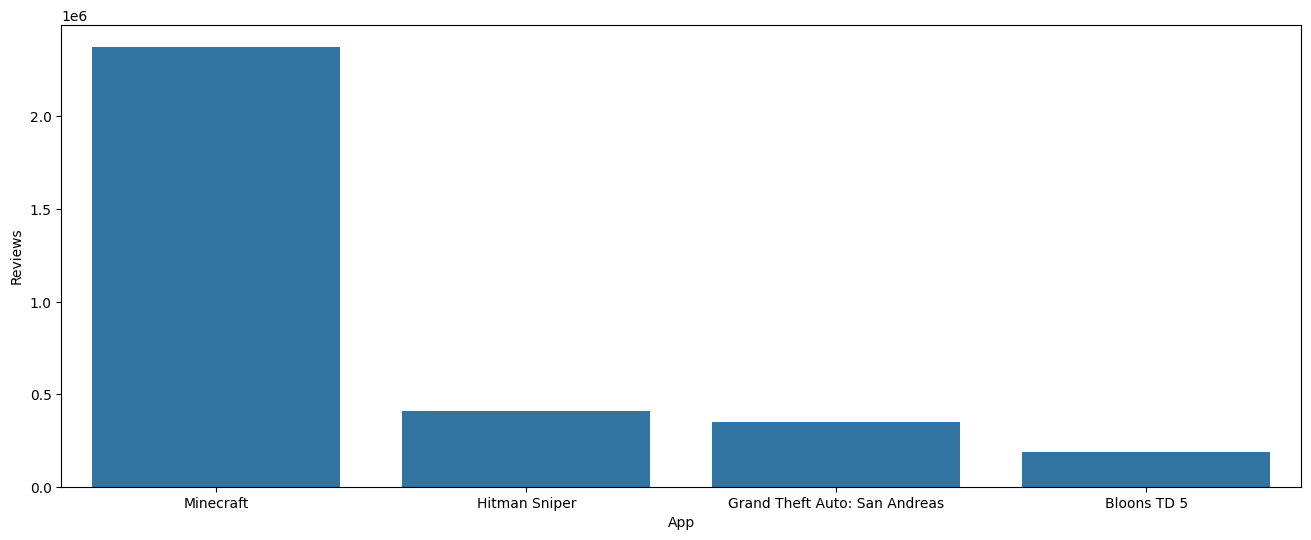

In [227]:
#plot 5 tops paid apps with highest number of reviews
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Reviews', data=df[df['Type']=='Paid'].sort_values(by='Reviews', ascending=False).head())